In [5]:
print("4,3,2,1,Ho jaye Shuru!!!")

4,3,2,1,Ho jaye Shuru!!!


In [6]:
from research_and_analyst.utils.model_loader import ModelLoader
model_loader = ModelLoader()

{"timestamp": "2025-10-23T14:05:27.425161Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2025-10-23T14:05:27.426460Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-10-23T14:05:27.427550Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2025-10-23T14:05:27.428076Z", "level": "warning", "event": "ASTRA_DB_API_ENDPOINT is missing from environment"}
{"timestamp": "2025-10-23T14:05:27.428616Z", "level": "warning", "event": "ASTRA_DB_APPLICATION_TOKEN is missing from environment"}
{"timestamp": "2025-10-23T14:05:27.429663Z", "level": "warning", "event": "ASTRA_DB_KEYSPACE is missing from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-10-23T14:05:27.432604Z", "level": "info", "event": "YAML config loaded"}


In [7]:
llm = model_loader.load_llm()

{"provider": "openai", "model": "gpt-4o", "timestamp": "2025-10-23T14:05:27.440596Z", "level": "info", "event": "Loading LLM"}


In [8]:
llm.invoke("Uactive?")

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


AIMessage(content='Could you please provide more context or clarify what you mean by "Uactive"? Are you referring to a specific product, service, or concept?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 10, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_65564d8ba5', 'id': 'chatcmpl-CTqESrKosCudyyI32CPs4Ih4vMWcw', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--11a0f7e9-8795-4331-8126-1d8c8f77b985-0', usage_metadata={'input_tokens': 10, 'output_tokens': 29, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [10]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver


In [11]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst")
    role: str = Field(description="Role of the analyst in the context of the topic")
    affiliation: str = Field(description="Primary affiliation of the analyst")
    description: str = Field(description="Description of the analyst focus, concerns and motives")

    @property
    def persona(self) ->str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"
    

In [12]:
class Perspectives(BaseModel):
    analysts: List[Analyst] = Field(description="Comprehenssive list of analysts with their roles and affiliations")

In [13]:
class GenerateAnalystState(TypedDict):
    topic: str # research topic
    max_analysts: int #number of analyst
    human_analyst_feedback: str #human feedback
    analysts: List[Analyst] # Analyst asking questions

In [14]:
analyst_instructions="""You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [15]:
print([analyst_instructions.format(
    topic="Astrology",
    max_analysts=4,
    human_analyst_feedback="Baisc astrology topics with astrophysics"
)] + ["Generate the set of analystics"])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\nAstrology\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nBaisc astrology topics with astrophysics\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analystics']


['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\nAstrology\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nBaisc astrology topics with astrophysics\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analystics']

# class GenerateAnalystState(TypedDict):
    - topic: str # research topic
    - max_analysts: int #number of analyst
    - human_analyst_feedback: str #human feedback
    - analysts: List[Analyst] # Analyst asking questions 

In [16]:
def create_analyst(state: GenerateAnalystState):
    """
    Fuction to create required analyst
    """

    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analayst_feedback = state.get("human_analyst_feedback", "")

    structured_llm = llm.with_structured_output(Perspectives)

    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analayst_feedback  
    )

    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts")])
    print("-*" * 50)
    print(analysts)
    print("-*" * 50)
    print(analysts.analysts[0])
    return {"analysts": analysts.analysts}

In [17]:
create_analyst(
    {'topic': 'astrology',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'}
    )

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
analysts=[Analyst(name='Dr. Celeste Orion', role='Astrology Historian', affiliation='Institute of Celestial Studies', description="Dr. Celeste Orion focuses on the historical development of astrology, tracing its origins from ancient civilizations to its influence in modern times. She is particularly interested in how astrology has been perceived and utilized across different cultures and epochs, and how its role has evolved in society. Her work aims to provide a comprehensive understanding of astrology's historical context and its impact on human thought and culture."), Analyst(name='Luna Starling', role='Astrology Skeptic and Science Communicator', affiliation='Rational Inquiry Society', description="Luna Starling is dedicated to critically examining the claims of astrology from a scientific perspective. She aims to educate the public about the lack of empirical evidence supporting as

{'analysts': [Analyst(name='Dr. Celeste Orion', role='Astrology Historian', affiliation='Institute of Celestial Studies', description="Dr. Celeste Orion focuses on the historical development of astrology, tracing its origins from ancient civilizations to its influence in modern times. She is particularly interested in how astrology has been perceived and utilized across different cultures and epochs, and how its role has evolved in society. Her work aims to provide a comprehensive understanding of astrology's historical context and its impact on human thought and culture."),
  Analyst(name='Luna Starling', role='Astrology Skeptic and Science Communicator', affiliation='Rational Inquiry Society', description="Luna Starling is dedicated to critically examining the claims of astrology from a scientific perspective. She aims to educate the public about the lack of empirical evidence supporting astrological predictions and the psychological factors that contribute to its popularity. Luna's 

In [18]:
def human_feedback(state: GenerateAnalystState):
    """ No-op node that should be interrupted on """
    pass

In [19]:
def should_continue(state: GenerateAnalystState):
    """ Return the next node to execute """
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["", "none", "skip", "done", "continue"]:
        return "create_analyst"
    return END

# First Workflow

In [20]:
builder = StateGraph(GenerateAnalystState)

In [21]:
builder.add_node("create_analyst", create_analyst)
builder.add_node("human_feedback",human_feedback)

In [22]:
builder.add_edge(START, "create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                              should_continue,
                              ["create_analyst",
                               END])

In [23]:
memory = MemorySaver()

In [24]:
graph = builder.compile(interrupt_before= ["human_feedback"], checkpointer=memory)

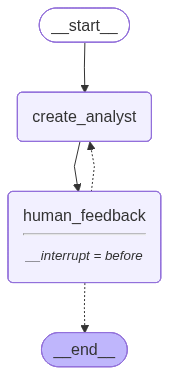

In [25]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [26]:
topic = "The benefit of astrology in modern world"

In [27]:
max_analysts = 2

In [28]:
thread = {"configurable": {"thread_id":1}}

In [29]:
for event in graph.stream({"topic":topic,
                           "max_analysts":max_analysts},
                           thread,
                           stream_mode="values"):
    analysts = event.get('analysts', '')

    if analysts:
        for analyst in analysts:
            print(f"Nmae: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" *50)


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
analysts=[Analyst(name='Dr. Celeste Harmon', role='Astrology and Psychology Researcher', affiliation='Institute of Humanistic Studies', description='Dr. Harmon focuses on the psychological benefits of astrology in the modern world. She is particularly interested in how astrology can provide individuals with a sense of identity and purpose, and how it can be used as a tool for self-reflection and personal growth. Her research explores the therapeutic aspects of astrology, examining how it can help people cope with stress and uncertainty in contemporary society.'), Analyst(name='Professor Leo Zhang', role='Cultural Anthropologist', affiliation='Global Society Research Center', description='Professor Zhang studies the cultural significance of astrology in the modern world. He investigates how astrology is integrated into various cultural practices and its role in shaping social dynamics. H

In [30]:
state = graph.get_state(thread)

In [31]:
state

StateSnapshot(values={'topic': 'The benefit of astrology in modern world', 'max_analysts': 2, 'analysts': [Analyst(name='Dr. Celeste Harmon', role='Astrology and Psychology Researcher', affiliation='Institute of Humanistic Studies', description='Dr. Harmon focuses on the psychological benefits of astrology in the modern world. She is particularly interested in how astrology can provide individuals with a sense of identity and purpose, and how it can be used as a tool for self-reflection and personal growth. Her research explores the therapeutic aspects of astrology, examining how it can help people cope with stress and uncertainty in contemporary society.'), Analyst(name='Professor Leo Zhang', role='Cultural Anthropologist', affiliation='Global Society Research Center', description='Professor Zhang studies the cultural significance of astrology in the modern world. He investigates how astrology is integrated into various cultural practices and its role in shaping social dynamics. His w

StateSnapshot(values={'topic': 'The benefit of astrology in modern world', 'max_analysts': 2, 'analysts': [Analyst(name='Dr. Celeste Harmon', role='Astrology and Psychology Researcher', affiliation='Institute of Humanistic Studies', description='Dr. Harmon focuses on the psychological benefits of astrology in the modern world. She is particularly interested in how astrology can provide individuals with a sense of identity and purpose, and how it can be used as a tool for self-reflection and personal growth. Her research explores the therapeutic aspects of astrology, examining how it can help people cope with stress and anxiety by offering a framework for understanding their experiences and emotions.'), Analyst(name='Professor Leo Grant', role='Cultural Anthropologist', affiliation='University of Global Cultures', description='Professor Grant studies the cultural significance of astrology in contemporary society. He investigates how astrology has been integrated into modern lifestyles and its impact on cultural practices and beliefs. His work examines the resurgence of astrology in digital spaces, such as social media, and how it influences community building and social interactions. Professor Grant is interested in the ways astrology intersects with technology and how it shapes modern cultural narratives.')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b00f8-6ccd-6f37-8001-899fccf26270'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-23T12:55:18.105682+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b00f8-409f-636d-8000-37af259d5272'}}, tasks=(PregelTask(id='ac0c81bc-ed1a-defe-72c6-a2103321a367', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=()

In [32]:
state.values

{'topic': 'The benefit of astrology in modern world',
 'max_analysts': 2,
 'analysts': [Analyst(name='Dr. Celeste Harmon', role='Astrology and Psychology Researcher', affiliation='Institute of Humanistic Studies', description='Dr. Harmon focuses on the psychological benefits of astrology in the modern world. She is particularly interested in how astrology can provide individuals with a sense of identity and purpose, and how it can be used as a tool for self-reflection and personal growth. Her research explores the therapeutic aspects of astrology, examining how it can help people cope with stress and uncertainty in contemporary society.'),
  Analyst(name='Professor Leo Zhang', role='Cultural Anthropologist', affiliation='Global Society Research Center', description='Professor Zhang studies the cultural significance of astrology in the modern world. He investigates how astrology is integrated into various cultural practices and its role in shaping social dynamics. His work examines the 

In [33]:
state.next

('human_feedback',)

In [34]:
memory.storage.items()

dict_items([('1', defaultdict(<class 'dict'>, {'': {'1f0b0195-9597-6f3e-bfff-24376461c2e1': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-23T14:05:36.819385+00:00\xa2id\xd9$1f0b0195-9597-6f3e-bfff-24376461c2e1\xb0channel_versions\x81\xa9__start__\xd9300000000000000000000000000000001.0.5185843585269533\xadversions_seen\x81\xa9__input__\x80\xb0updated_channels\x91\xa9__start__'), ('msgpack', b'\x83\xa6source\xa5input\xa4step\xff\xa7parents\x80'), None), '1f0b0195-959b-6a70-8000-13def053124e': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-23T14:05:36.820900+00:00\xa2id\xd9$1f0b0195-959b-6a70-8000-13def053124e\xb0channel_versions\x84\xa9__start__\xd9300000000000000000000000000000002.0.3859095303251615\xa5topic\xd9300000000000000000000000000000002.0.3859095303251615\xacmax_analysts\xd9300000000000000000000000000000002.0.3859095303251615\xb8branch:to:create_analyst\xd9300000000000000000000000000000002.0.3859095303251615\xadversions_seen\x82\xa9__input__\x80\xa9__start__\x81\xa9__start__\xd

dict_items([('1', defaultdict(<class 'dict'>, {'': {'1f0b00f8-4098-69b2-bfff-7d0dd8e5904c': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-23T12:55:13.470097+00:00\xa2id\xd9$1f0b00f8-4098-69b2-bfff-7d0dd8e5904c\xb0channel_versions\x81\xa9__start__\xd9300000000000000000000000000000001.0.2110699973301451\xadversions_seen\x81\xa9__input__\x80\xb0updated_channels\x91\xa9__start__'), ('msgpack', b'\x83\xa6source\xa5input\xa4step\xff\xa7parents\x80'), None), '1f0b00f8-409f-636d-8000-37af259d5272': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-23T12:55:13.472804+00:00\xa2id\xd9$1f0b00f8-409f-636d-8000-37af259d5272\xb0channel_versions\x84\xa9__start__\xd9300000000000000000000000000000002.0.3131316198005256\xa5topic\xd9300000000000000000000000000000002.0.3131316198005256\xacmax_analysts\xd9300000000000000000000000000000002.0.3131316198005256\xb8branch:to:create_analyst\xd9300000000000000000000000000000002.0.3131316198005256\xadversions_seen\x82\xa9__input__\x80\xa9__start__\x81\xa9__start__\xd9300000000000000000000000000000001.0.2110699973301451\xb0updated_channels\x93\xb8branch:to:create_analyst\xacmax_analysts\xa5topic'), ('msgpack', b'\x83\xa6source\xa4loop\xa4step\x00\xa7parents\x80'), '1f0b00f8-4098-69b2-bfff-7d0dd8e5904c'), '1f0b00f8-6ccd-6f37-8001-899fccf26270': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-23T12:55:18.105682+00:00\xa2id\xd9$1f0b00f8-6ccd-6f37-8001-899fccf26270\xb0channel_versions\x86\xa9__start__\xd9300000000000000000000000000000002.0.3131316198005256\xa5topic\xd9300000000000000000000000000000002.0.3131316198005256\xacmax_analysts\xd9300000000000000000000000000000002.0.3131316198005256\xb8branch:to:create_analyst\xd9400000000000000000000000000000003.0.39286179787546727\xa8analysts\xd9400000000000000000000000000000003.0.39286179787546727\xb8branch:to:human_feedback\xd9400000000000000000000000000000003.0.39286179787546727\xadversions_seen\x83\xa9__input__\x80\xa9__start__\x81\xa9__start__\xd9300000000000000000000000000000001.0.2110699973301451\xaecreate_analyst\x81\xb8branch:to:create_analyst\xd9300000000000000000000000000000002.0.3131316198005256\xb0updated_channels\x92\xa8analysts\xb8branch:to:human_feedback'), ('msgpack', b'\x83\xa6source\xa4loop\xa4step\x01\xa7parents\x80'), '1f0b00f8-409f-636d-8000-37af259d5272')}}))])

In [35]:
state.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b0195-e9d2-6404-8001-3626cc8afbdf'}}

In [36]:
graph.update_state(thread,
                   {"human_analyst_feedback":"add something from human mind that is affected by planet positions"},as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b0195-ea7e-6f4c-8002-dc2a699aead4'}}

In [37]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

Name: Dr. Celeste Harmon
Affiliation: Institute of Humanistic Studies
Role: Astrology and Psychology Researcher
Description: Dr. Harmon focuses on the psychological benefits of astrology in the modern world. She is particularly interested in how astrology can provide individuals with a sense of identity and purpose, and how it can be used as a tool for self-reflection and personal growth. Her research explores the therapeutic aspects of astrology, examining how it can help people cope with stress and uncertainty in contemporary society.
--------------------------------------------------
Name: Professor Leo Zhang
Affiliation: Global Society Research Center
Role: Cultural Anthropologist
Description: Professor Zhang studies the cultural significance of astrology in the modern world. He investigates how astrology is integrated into various cultural practices and its role in shaping social dynamics. His work examines the resurgence of astrology among younger generations and its impact on cu

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
analysts=[Analyst(name='Dr. Celeste Harmon', role='Astrological Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Celeste Harmon explores the psychological benefits of astrology, focusing on how planetary positions can influence human emotions and behaviors. She is particularly interested in how astrology can provide individuals with a framework for self-reflection and personal growth, helping them to understand their emotional responses and interpersonal dynamics.'), Analyst(name='Professor Leo Vedic', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and its impact on societal trends. His work highlights the enduring appeal of astrology as a to

In [38]:
state = graph.get_state(thread)

In [39]:
state

StateSnapshot(values={'topic': 'The benefit of astrology in modern world', 'max_analysts': 2, 'human_analyst_feedback': 'add something from human mind that is affected by planet positions', 'analysts': [Analyst(name='Dr. Celeste Harmon', role='Astrological Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Celeste Harmon explores the psychological benefits of astrology, focusing on how planetary positions can influence human emotions and behaviors. She is particularly interested in how astrology can provide individuals with a framework for self-reflection and personal growth, helping them to understand their emotional responses and interpersonal dynamics.'), Analyst(name='Professor Leo Vedic', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and

StateSnapshot(values={'topic': 'The benefit of astrology in modern world', 'max_analysts': 2, 'human_analyst_feedback': 'add something from human mind that is affected by planet positions', 'analysts': [Analyst(name='Dr. Celeste Harmon', role='Astrological Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Celeste Harmon focuses on the psychological benefits of astrology in the modern world. She explores how planetary positions can influence human emotions and behaviors, providing insights into personal development and mental well-being. Her work aims to bridge the gap between traditional astrological beliefs and contemporary psychological practices, emphasizing the therapeutic potential of astrology in understanding oneself and others.'), Analyst(name='Professor Leo Vance', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vance examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has evolved and adapted to contemporary society, influencing cultural trends and personal identity. His research highlights the enduring appeal of astrology as a tool for self-reflection and its role in shaping modern cultural narratives, particularly in how individuals relate to the cosmos and their place within it.')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b0105-09d8-6d18-8005-e98df0ab1e2f'}}, metadata={'source': 'loop', 'step': 5, 'parents': {}}, created_at='2025-10-23T13:00:56.695324+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b0104-c3d9-6490-8004-f5d5e713b52a'}}, tasks=(PregelTask(id='92ed3c77-98d2-315c-f81d-3ac36f449d8e', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=()

In [40]:
state.next

('human_feedback',)

In [41]:
state.values

{'topic': 'The benefit of astrology in modern world',
 'max_analysts': 2,
 'human_analyst_feedback': 'add something from human mind that is affected by planet positions',
 'analysts': [Analyst(name='Dr. Celeste Harmon', role='Astrological Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Celeste Harmon explores the psychological benefits of astrology, focusing on how planetary positions can influence human emotions and behaviors. She is particularly interested in how astrology can provide individuals with a framework for self-reflection and personal growth, helping them to understand their emotional responses and interpersonal dynamics.'),
  Analyst(name='Professor Leo Vedic', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and its impact on s

In [42]:
# If we are satisfied, then we simply supply no feedback
further_feedack = ""

In [43]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [44]:
cfg

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b0196-4425-67c8-8005-7c80f43477f5'}}

In [45]:
# 3) Update feedback at the 'human_feedback' node
#    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b0196-44e5-6084-8006-580965f7aa8f'}}

In [46]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next)  # should be (END,)

()


In [47]:
analysts = final_state.values.get('analysts')

In [48]:
analysts

[Analyst(name='Dr. Celeste Harmon', role='Astrological Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Celeste Harmon explores the psychological benefits of astrology, focusing on how planetary positions can influence human emotions and behaviors. She is particularly interested in how astrology can provide individuals with a framework for self-reflection and personal growth, helping them to understand their emotional responses and interpersonal dynamics.'),
 Analyst(name='Professor Leo Vedic', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and its impact on societal trends. His work highlights the enduring appeal of astrology as a tool for navigating uncertainty and making sense of complex global events.')]

In [49]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Role: {analyst.role}")
    print(f"Description: {analyst.description}")
    print("-" * 50) 

Name: Dr. Celeste Harmon
Affiliation: Institute of Cosmic Psychology
Role: Astrological Psychologist
Description: Dr. Celeste Harmon explores the psychological benefits of astrology, focusing on how planetary positions can influence human emotions and behaviors. She is particularly interested in how astrology can provide individuals with a framework for self-reflection and personal growth, helping them to understand their emotional responses and interpersonal dynamics.
--------------------------------------------------
Name: Professor Leo Vedic
Affiliation: University of New Age Studies
Role: Cultural Historian
Description: Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and its impact on societal trends. His work highlights the enduring appeal of astrology as a tool for navigating uncertainty and making sense of complex global events.
------------------

# Second Workflow

In [50]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="langgraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


In [51]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

In [52]:
from langchain_community.utilities import GoogleSerperAPIWrapper
serper = GoogleSerperAPIWrapper()
serper.run("Why astrology is misunderstood?")

"Astrology is complete nonsense that relies on taking advantage of human cognitive biases (confirmation bias, Barnum effect, among others). 11. Astrologists can't point out any new research in the past 3,000 years. A science with the scientific research is a misnamed endeavor. Astrology is about empowerment and awareness, not fate or fortune-telling. It's a tool that can offer profound insights into who you are and how you can grow. Astrology is not a science. It pretends to be, claiming to be valid and scientific, but it is based on myth and superstition, not on logic, ... Astrology largely exploits people's tendencies to buy into generic descriptions of themselves. Modern astrophycists have pointed out that, ... “Astrology is rubbish”, this is because there is no evidence that celestial objects can affect our lives, events and emotions in the way that is claimed. Astrology is scientifically misleading, as it uses astronomy as its root. However, the conclusions made are not scientific

"The idea that the stars or planets are physically influencing people, their behaviors, and events is in my opinion a corrupted form of Astrology ... 11. Astrologists can't point out any new research in the past 3,000 years. A science with the scientific research is a misnamed endeavor. Astrology is about empowerment and awareness, not fate or fortune-telling. It's a tool that can offer profound insights into who you are and how you can grow. Astrology is not a science. It pretends to be, claiming to be valid and scientific, but it is based on myth and superstition, not on logic, ... The main reason astrological signs fail to line up with the zodiac, though, is a wobble in the Earth's rotational axis called precession. Astrology is scientifically misleading, as it uses astronomy as its root. However, the conclusions made are not scientific, rather mere ... Here are some of the most common misunderstandings many folks have about astrology. Myth #1: You have a singular zodiac sign, and that alone defines your chart. “Astrology is rubbish”, this is because there is no evidence that celestial objects can affect our lives, events and emotions in the way that is claimed. Astrological charts have fated events but the way or time in which we reach these events does come down to the individual's healing journey up ... Myth #3: Astrology can predict or change the future. This is, perhaps, the most dangerous assumption people make about astrology. Contrary to ..."

In [53]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [54]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [55]:
tavily_search = TavilySearchResults()

C:\Users\shank\AppData\Local\Temp\ipykernel_18324\13742946.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults()


In [56]:
tavily_search.invoke("Astrology")

[{'title': 'Astrology | Chart, Zodiac Signs, Meaning, Definition, History, India ...',
  'url': 'https://www.britannica.com/topic/astrology',
  'content': 'Astrology is a method of predicting mundane events based upon the assumption that the celestial bodies—particularly the planets and the stars considered in their arbitrary combinations or configurations (called constellations)—in some way either determine or indicate changes ion Earth. The theoretical basis for this assumption lies historically in Hellenistic philosophy and radically distinguishes astrology from the celestial omina (“omens”) that were first categorized and cataloged in ancient [...] Astrology is a type of divination that involves forecasting earthly and human events through the observation and interpretation of the location and movement of the celestial bodies like stars, the Sun, the Moon, and planets. The positions of these celestial bodies at certain times are read as signs according to the interpretive models of

In [57]:
import operator
from typing import Annotated
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for send() API


class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Search query for retrieval")

In [58]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [59]:
print(analyst.persona)

Name: Professor Leo Vedic
Role: Cultural Historian
Affiliation: University of New Age Studies
Description: Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and its impact on societal trends. His work highlights the enduring appeal of astrology as a tool for navigating uncertainty and making sense of complex global events.



In [60]:
print(question_instructions.format(goals = analyst.persona))

You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.

2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: Name: Professor Leo Vedic
Role: Cultural Historian
Affiliation: University of New Age Studies
Description: Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and its impact on societal trends. His work highlights the enduring appeal of astrology as a tool for navigating uncertainty and making sense of complex global events.


Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your u

In [61]:
def generation_question(state: InterviewState):
    """ Node to generate the questions"""

    # Get State
    analyst = state["analyst"]
    messages = state["messages"]

    #generate the question
    system_message = question_instructions.format( goals = analyst.persona)
    question = llm.invoke([SystemMessage(content=system_message)] + messages)

    # return the question through state
    return {"messages": [question]}

In [62]:
print(analyst)

name='Professor Leo Vedic' role='Cultural Historian' affiliation='University of New Age Studies' description='Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and its impact on societal trends. His work highlights the enduring appeal of astrology as a tool for navigating uncertainty and making sense of complex global events.'


name='Professor Leo Vance' role='Cultural Historian' affiliation='University of New Age Studies' description='Professor Leo Vance examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has evolved and adapted to contemporary society, influencing cultural trends and personal identity. His research highlights the enduring appeal of astrology as a tool for self-reflection and its role in shaping modern cultural narratives, particularly in how individuals relate to the cosmos and their place within it.'

# class InterviewState(MessagesState):
   - max_num_turns: int # Number turns of conversation
   - context: Annotated[list, operator.add] # source docs
   - analyst: Analyst # Analyst asking questions
   - interview: str # Interview transcript
   - sections: list # Final key we duplicate in outer state for send() API

In [63]:
state = {"max_num_turns":2,"context":[], "analyst": analyst, "interview":"", "sections":[], "messages": [HumanMessage(content="Do the proper search according to the expertise")]}

In [64]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Professor Leo Vedic', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and its impact on societal trends. His work highlights the enduring appeal of astrology as a tool for navigating uncertainty and making sense of complex global events.'),
 'interview': '',
 'sections': [],
 'messages': [HumanMessage(content='Do the proper search according to the expertise', additional_kwargs={}, response_metadata={})]}

In [65]:
result = generation_question(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [66]:
result

{'messages': [AIMessage(content="Hello, Professor Vedic. My name is Alex Thompson, and I'm an analyst with a keen interest in cultural history. I'm fascinated by your work on the cultural and historical significance of astrology in the modern world. To start, could you share some specific examples of how astrology has been integrated into contemporary practices?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 247, 'total_tokens': 308, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_65564d8ba5', 'id': 'chatcmpl-CTqEz8hY4OroRdGoDU9sDMI8I5Cfv', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--fbcf47bb-8446-41c3-b30a-c13ae04f475f-0', usage_metadata={'input_tokens': 247, 'output

{'messages': [AIMessage(content="Hello, Professor Vance. My name is Alex Carter, and I'm an analyst with a keen interest in cultural history and its modern implications. I'm fascinated by your work on the cultural and historical significance of astrology in today's world. Could you share some insights into how astrology has evolved to fit into contemporary society? Specifically, are there any surprising ways it has influenced cultural trends or personal identities that might not be immediately obvious?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 265, 'total_tokens': 348, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CTpSmRYX2h9pKe9CH1wzBhnJ1e7Xm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--1db149e1-5d79-4e6a-8557-a0fa2171a50f-0', usage_metadata={'input_tokens': 265, 'output_tokens': 83, 'total_tokens': 348, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [67]:
print(result["messages"][0].content)

Hello, Professor Vedic. My name is Alex Thompson, and I'm an analyst with a keen interest in cultural history. I'm fascinated by your work on the cultural and historical significance of astrology in the modern world. To start, could you share some specific examples of how astrology has been integrated into contemporary practices?


In [68]:
from langchain_core.messages import get_buffer_string

In [69]:
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert.
                                    Your goal is to generate a  well-structured query for use in retrieval and / or web search related to the conversation.
                                    First,, analyze the full conversation.
                                    Pay particular attention to the final question posed by the analyst.
                                    Convert this final question into a well-structured we search query 
                                    """ )

In [70]:
def search_web(state: InterviewState):
    """
    Retrieve data from the web
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions] + state["messages"])

    # Search
    search_docs = tavily_search.invoke(search_query.search_query)

    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )
    print("-tavily*" *50)
    return {"context": [formatted_search_docs]}

In [71]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","messages":[AIMessage(content="Hello, Professor Vance. My name is Alex Carter, and I'm an analyst with a keen interest in cultural history and its modern implications. I'm fascinated by your work on the cultural and historical significance of astrology in today's world. Could you share some insights into how astrology has evolved to fit into contemporary society? Specifically, are there any surprising ways it has influenced cultural trends or personal identities that might not be immediately obvious?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 265, 'total_tokens': 348, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CTpSmRYX2h9pKe9CH1wzBhnJ1e7Xm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--1db149e1-5d79-4e6a-8557-a0fa2171a50f-0', usage_metadata={'input_tokens': 265, 'output_tokens': 83, 'total_tokens': 348, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [72]:
result = search_web(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*


In [73]:
print(result["context"][0])

<Document href="https://www.matchastro.com/blog/astrology/the-history-of-astrology-from-ancient-civilizations-to-modern-interpretations"/>
Astrology's journey from ancient civilizations to modern interpretations is a testament to its enduring appeal and adaptability. While its role has evolved over millennia, its influence on culture, religion, and personal identity remains significant. As we continue to explore the cosmos, astrology reminds us of our timeless fascination with the stars.

Consult our experts

>

Recent blogs

Panchanga

Why Is Thai Poosam Celebrated? The Story of Lord Murugan and ...

Panchanga [...] In medieval Europe, astrology enjoyed significant status, influencing medicine, agriculture, and personal decision-making. Universities taught astrology as part of the quadrivium, and prominent scholars like Albertus Magnus and Roger Bacon advocated its use. Astrological charts were even used to diagnose illnesses and determine treatments.

### Modern Astrology

20th Centu

In [74]:
def search_serper(state: InterviewState):
    """
    Retrieve data from the web using serper
    """
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions] + state["messages"])

    print("-serper*" *50)
    print(search_query)

    # Search
    search_docs = serper.run(search_query.search_query)

    return {"context": [search_docs]}


In [75]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","messages":[AIMessage(content="Hello, Professor Vance. My name is Alex Carter, and I'm an analyst with a keen interest in cultural history and its modern implications. I'm fascinated by your work on the cultural and historical significance of astrology in today's world. Could you share some insights into how astrology has evolved to fit into contemporary society? Specifically, are there any surprising ways it has influenced cultural trends or personal identities that might not be immediately obvious?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 265, 'total_tokens': 348, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CTpSmRYX2h9pKe9CH1wzBhnJ1e7Xm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--1db149e1-5d79-4e6a-8557-a0fa2171a50f-0', usage_metadata={'input_tokens': 265, 'output_tokens': 83, 'total_tokens': 348, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [76]:
result = search_serper(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='evolution of astrology in contemporary society cultural trends personal identities'


In [77]:
result["context"]

["Understanding the history of astrology gives us insight into its ancient origins, cultural significance, and ongoing influence. Astrology has woven itself into human history as a guiding force, influencing civilizations and cultures from ancient times to the modern world. by P Clements · 2020 · Cited by 15 — Astrology re-emerged from folk culture in the UK at the end of the nineteenth century, due in part to the popularity of the Theosophical ... This paper will delve into the key principles of astrology, its history, and its cultural significance, exploring how it continues to shape personal identities, ... Astrology's Role in Community Influence ... Astrology has not only fascinated individuals but also shaped cultural and societal frameworks. Its ubiquity in contemporary social life suggests that astrology may be an important component of Americans' identity and lived experience. Moving into the present era, the dynamics of popular astrology have shifted even further away from the

["Understanding the history of astrology gives us insight into its ancient origins, cultural significance, and ongoing influence. Astrology's Role in Community Influence ... Astrology has not only fascinated individuals but also shaped cultural and societal frameworks. Astrology has woven itself into human history as a guiding force, influencing civilizations and cultures from ancient times to the modern world. This paper will delve into the key principles of astrology, its history, and its cultural significance, exploring how it continues to shape personal identities, ... by P Clements · 2020 · Cited by 15 — Astrology re-emerged from folk culture in the UK at the end of the nineteenth century, due in part to the popularity of the Theosophical ... Its ubiquity in contemporary social life suggests that astrology may be an important component of Americans' identity and lived experience. Moving into the present era, the dynamics of popular astrology have shifted even further away from the spiritual domain, succumbing instead to ... Astrology is currently enjoying a broad cultural acceptance that hasn't been seen since the nineteen-seventies. The shift began with the advent ... As a belief system, astrology continues to evolve, serving as both a reflection of cultural identities and a universal language of human connection with the ... Historically, humans looked to the stars for collective guidance, but in modern times, astrology has transformed into a tool for introspection and personal ..."]

In [78]:
from langchain_community.document_loaders import  ArxivLoader


In [79]:
# def search_arxiv(state: InterviewState):
#     """
#     Retrieve data from the web
#     """
#     structure_llm = llm.with_structured_output(SearchQuery)
#     search_query = structure_llm.invoke([search_instructions] + state["messages"])

#     # Search
#     search_docs = ArxivLoader(search_query.search_query).load()

#     formatted_search_docs = "\n\n".join(doc.page_content[:1000] for doc in search_docs[:2]) or "No papers found"
#     print("-arxiv*" *50)
#     print(formatted_search_docs)

#     return {"context": [formatted_search_docs]}

In [80]:
import arxiv

def search_arxiv(state: InterviewState):
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions] + state["messages"])

    search = arxiv.Search(query=search_query.search_query, max_results=2)
    results = []
    for result in search.results():
        results.append(f"Title: {result.title}\nSummary: {result.summary}\nURL: {result.entry_id}")

    formatted_search_docs = "\n\n".join(results) or "No papers found"
    return {"context": [formatted_search_docs]}

In [81]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","messages":[AIMessage(content="Hello, Professor Vance. My name is Alex Carter, and I'm an analyst with a keen interest in cultural history and its modern implications. I'm fascinated by your work on the cultural and historical significance of astrology in today's world. Could you share some insights into how astrology has evolved to fit into contemporary society? Specifically, are there any surprising ways it has influenced cultural trends or personal identities that might not be immediately obvious?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 265, 'total_tokens': 348, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CTpSmRYX2h9pKe9CH1wzBhnJ1e7Xm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--1db149e1-5d79-4e6a-8557-a0fa2171a50f-0', usage_metadata={'input_tokens': 265, 'output_tokens': 83, 'total_tokens': 348, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [82]:
result = search_arxiv(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
C:\Users\shank\AppData\Local\Temp\ipykernel_18324\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=evolution+of+astrology+in+contemporary+society+cultural+trends+personal+identities&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
Got first page: 25 of 2859219 total results


In [83]:
result["context"]

['Title: Toward Socially Aware Vision-Language Models: Evaluating Cultural Competence Through Multimodal Story Generation\nSummary: As Vision-Language Models (VLMs) achieve widespread deployment across diverse\ncultural contexts, ensuring their cultural competence becomes critical for\nresponsible AI systems. While prior work has evaluated cultural awareness in\ntext-only models and VLM object recognition tasks, no research has\nsystematically assessed how VLMs adapt outputs when cultural identity cues are\nembedded in both textual prompts and visual inputs during generative tasks. We\npresent the first comprehensive evaluation of VLM cultural competence through\nmultimodal story generation, developing a novel multimodal framework that\nperturbs cultural identity and evaluates 5 contemporary VLMs on a downstream\ntask: story generation. Our analysis reveals significant cultural adaptation\ncapabilities, with rich culturally-specific vocabulary spanning names, familial\nterms, and geogr

In [84]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}.

Your goal is to answer a question posed by the interviewer.

To answer question, use this context:

{context}

When answering questions, follow these guidelines:

1. Use only the information provided in the context.

2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sorces at the topic of each individual document.

4. Include these sources in your answer next to any relevant statements. For example, for source # 1 use [1].

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc

6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list:

[1] assistant/docs/llama3_1.pdf, page 7

And skip the addition of the brackets as well as the Document source preamble in your citation

"""

In [85]:
def generate_answer(state:InterviewState):

    """ Node to answer a question """

    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    system_message = answer_instructions.format(goals=analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)] + messages)

    # Name the message as coming from the expert
    answer.name = "expert"

    # Append it to state
    return {"messages":[answer]}

In [86]:
def route_messages(state: InterviewState,
                   name: str = "expert"):
    """ Route between question and answer """

    # Get messages
    messages = state["messages"]
    max_num_turns = state.get("max_num_turns", 2)

    # Check the number of expert answers
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # End if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return "save_interview"
    
    # This router is run after each question - answer pair 
    # Get the last question asked to check if it signals the end of discussion
    last_question = messages[-2]

    if "Thank You so much for your help" in last_question.content:
        return "save_interview"
    
    return "ask_question"

In [87]:
def save_interview(state: InterviewState):

    """Save Interviews """

    # Get messages
    messages = state["messages"]

    # Convert interview to a string
    interview = get_buffer_string(messages)

    # Save to interviews key
    return {"interview": interview}

In [88]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [89]:
def write_section(state: InterviewState):

    """ Node to answer a question """

    # get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]

    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus=analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)] + [HumanMessage(content=f"Use this source to write your section: {context}")])

    # Append it to state
    return {"sections": [section.content]}

In [90]:
interview_builder = StateGraph(InterviewState)

In [91]:
interview_builder.add_node("ask_question", generation_question )
interview_builder.add_node("search_web", search_web )
interview_builder.add_node("search_serper", search_serper )
interview_builder.add_node("search_arxiv", search_arxiv )
interview_builder.add_node("generate_answer", generate_answer )
interview_builder.add_node("save_interview", save_interview )
interview_builder.add_node("write_section", write_section )

In [92]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question","search_web")
interview_builder.add_edge("ask_question","search_serper")
interview_builder.add_edge("ask_question","search_arxiv")
interview_builder.add_edge("search_web","generate_answer")
interview_builder.add_edge("search_serper","generate_answer")
interview_builder.add_edge("search_arxiv","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                                        route_messages,
                                        ["ask_question",
                                         "save_interview"])
interview_builder.add_edge("save_interview","write_section")
interview_builder.add_edge("write_section",END)

In [93]:
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")


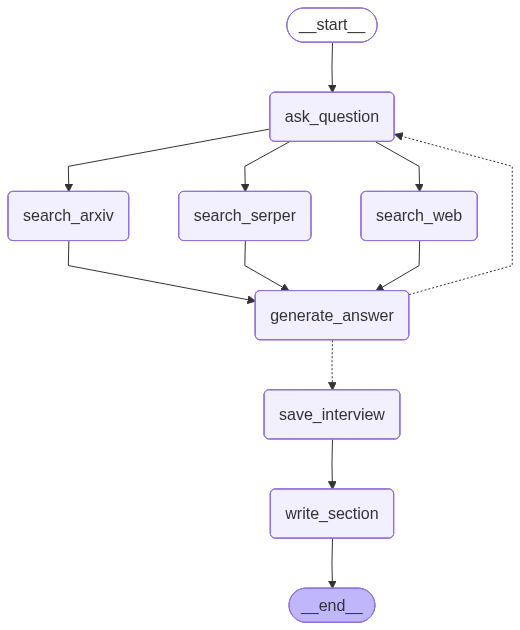

In [94]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [95]:
analyst

Analyst(name='Professor Leo Vedic', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and its impact on societal trends. His work highlights the enduring appeal of astrology as a tool for navigating uncertainty and making sense of complex global events.')

In [96]:
analyst.persona

'Name: Professor Leo Vedic\nRole: Cultural Historian\nAffiliation: University of New Age Studies\nDescription: Professor Leo Vedic examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary practices and its impact on societal trends. His work highlights the enduring appeal of astrology as a tool for navigating uncertainty and making sense of complex global events.\n'

In [97]:
thread = {"configurable": {"thread_id": "1"}}

In [98]:
from IPython.display import Markdown

In [99]:
messages = [HumanMessage("So you said you were writing an article on planetery position and it's effect on humans?")]

In [100]:
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turns": 2}, thread)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
C:\Users\shank\AppData\Local\Temp\ipykernel_18324\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=examples+of+astrology+integration+in+contemporary+practices+and+its+impact+on+societal+trends&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='examples of astrology in contemporary practices and its impact on society'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Got first page: 100 of 2865174 total results


-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='examples of astrology used to navigate uncertainty in global events'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
C:\Users\shank\AppData\Local\Temp\ipykernel_18324\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=examples+of+astrology+used+to+navigate+uncertainty+in+global+events&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
Got first page: 25 of 2863202 total results
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [101]:
Markdown(interview['sections'][0])

## Astrology: A Timeless Guide in Modern Times

### Summary

Astrology, an ancient practice that interprets the influence of celestial bodies on human affairs, continues to captivate the modern world. Its integration into contemporary culture and its impact on societal trends are subjects of ongoing exploration. Professor Leo Vedic's analysis highlights astrology's enduring appeal as a tool for navigating uncertainty and making sense of complex global events. This report delves into the cultural and historical significance of astrology, examining its integration into modern practices and its influence on identity and decision-making.

Astrology's roots can be traced back to ancient civilizations, where it was used to guide decisions and predict events. Despite its historical significance, astrology has often been overshadowed by more systematic scientific approaches. However, recent studies, such as the analysis of Vettius Valens' Anthologies, reveal a consistent internal logic in astrological practices, suggesting a methodological technique of combinatorial reasoning [1]. This challenges the perception of astrology as arbitrary and highlights its potential as a structured tool for understanding human behavior and societal trends.

In contemporary society, astrology has permeated various facets of pop culture, from fashion to social media. The Quirky Naari's Zodiac T-shirts exemplify how astrology shapes modern fashion, allowing individuals to express their astrological identities [2]. This trend reflects a broader cultural movement where astrology serves as a language for identity, offering tools for self-reflection and personal growth.

Astrology's influence extends beyond personal identity, impacting societal dynamics and decision-making. It provides a framework for understanding global events, with astrologers interpreting planetary movements to anticipate geopolitical and economic shifts [3]. This perspective offers a unique lens through which to view the world, emphasizing the interconnectedness of celestial and earthly phenomena.

Despite its popularity, astrology remains a subject of debate, with critics questioning its scientific validity. However, its widespread appeal suggests that astrology fulfills a fundamental human desire for meaning and connection. It fosters communities, both online and offline, where individuals engage in dialogue and self-reflection, contributing to a sense of belonging and shared experience [4].

In conclusion, astrology's integration into modern culture underscores its enduring relevance. As a tool for navigating uncertainty, it offers insights into personal and collective experiences, shaping identity and guiding decisions. Professor Leo Vedic's work highlights the significance of astrology in contemporary society, inviting further exploration of its cultural and historical impact.

### Sources
[1] http://arxiv.org/abs/2205.07616v1  
[2] https://thequirkynaari.com/blogs/product-blogs/the-influence-of-astrology-on-modern-pop-culture?srsltid=AfmBOopFvPZ_0c3D8mSx5oJbAFWcENAOXgqAGpKCTjJsXzV2xstCUf5q  
[3] https://medium.com/@astroindusoot22/planetary-movements-and-global-events-the-astrologers-perspective-dad1c0ce5474  
[4] https://www.brookes.ac.uk/about-brookes/news/news-from-2025/05/expert-comment-why-is-gen-z-looking-to-the-stars-f  

# Third Workflow

In [102]:
from typing_extensions import TypedDict
from typing import List, Annotated
import operator

In [145]:
class ResearchGraphState(TypedDict):
    topic: str # Research Topic
    max_analysts: int # Number of analysts
    human_analyst_feedback: str # Human Feedback
    analysts: List[Analyst] # Analyst asking questions
    sections: Annotated[list, operator.add] # Report Sections Send() API Key
    introduction: str # Introduction for the final report
    content: str # Final Report Content
    conclusion: str # Conclusion for the final report
    final_report: str # Final Report

In [146]:
from langgraph.types import Send

In [147]:
def initiate_all_interviews(state: ResearchGraphState):
    """ This is the 'map' step where we run each interview sub-graph using Send API """

    # check if human feedback
    human_analyst_feedback = state.get("human_analyst_feedback")
    if human_analyst_feedback:
        # Return to create_analysts
        return "create_analysts"
    
    # Otherwise kick off interviews in parallel via Send() Api
    topic = state["topic"]
    return [Send("conduct_interview", {"analyst": analyst,
                                       "messages": [HumanMessage(
                                           content=f"So you were writing an article on topic: {topic}"
                                       )]}) for analyst in state["analysts"]]


In [148]:
report_writer_instructions = """You are a technical writer creating a report on this overall topic: 

{topic}
    
You have a team of analysts. Each analyst has done two things: 

1. They conducted an interview with an expert on a specific sub-topic.
2. They write up their finding into a memo.

Your task: 

1. You will be given a collection of memos from your analysts.
2. Think carefully about the insights from each memo.
3. Consolidate these into a crisp overall summary that ties together the central ideas from all of the memos. 
4. Summarize the central points in each memo into a cohesive single narrative.

To format your report:
 
1. Use markdown formatting. 
2. Include no pre-amble for the report.
3. Use no sub-heading. 
4. Start your report with a single title header: ## Insights
5. Do not mention any analyst names in your report.
6. Preserve any citations in the memos, which will be annotated in brackets, for example [1] or [2].
7. Create a final, consolidated list of sources and add to a Sources section with the `## Sources` header.
8. List your sources in order and do not repeat.

[1] Source 1
[2] Source 2

Here are the memos from your analysts to build your report from: 

{context}"""

In [149]:
def write_report(state: ResearchGraphState):
    """ Node to write the final report"""

    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # Summarize the sections into a final report
    system_message = report_writer_instructions.format(topic=topic, context=formatted_str_sections)
    report = llm.invoke([SystemMessage(content=system_message)] + [HumanMessage(content=f"Write a report based upon these memos")])
    return {"content": report.content}

In [150]:
intro_conclusion_instructions = """You are a technical writer finishing a report on {topic}

You will be given all of the sections of the report.

You job is to write a crisp and compelling introduction or conclusion section.

The user will instruct you whether to write the introduction or conclusion.

Include no pre-amble for either section.

Target around 100 words, crisply previewing (for introduction) or recapping (for conclusion) all of the sections of the report.

Use markdown formatting. 

For your introduction, create a compelling title and use the # header for the title.

For your introduction, use ## Introduction as the section header. 

For your conclusion, use ## Conclusion as the section header.

Here are the sections to reflect on for writing: {formatted_str_sections}"""

In [151]:
def write_introduction(state: ResearchGraphState):
    """ Node to write introduction """

    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # Write introduction
    system_message = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)
    introduction = llm.invoke([SystemMessage(content=system_message)] + [HumanMessage(content="Write the introduction section")])
    return {"introduction": introduction.content}

In [152]:
def write_conclusion(state: ResearchGraphState):
    """ Node to write conclusion """

    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # Write conclusion
    system_message = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)
    conclusion = llm.invoke([SystemMessage(content=system_message)] + [HumanMessage(content="Write the conclusion section")])
    return {"conclusion": conclusion.content}

In [153]:
def finalize_report(state: ResearchGraphState):
    """ Node to finalize the report, this is the 'reduce' step where we gather all the sections, combine them, and reflect on them to write the intro/conclusion """

    # Save full final report 
    content = state["content"]
    
    if content.startswith("## Insights"):
        content = content.strip("## Insights")

    if "## Sources" in content:
        try:
            content, sources = content.split("\n## Sources\n")

        except:
            sources = None

    else:
        sources = None

    final_report = state["introduction"] + "\n\n---\n\n" + content + "\n\n---\n\n" + state["conclusion"]

    if sources is not None:
        final_report += "\n\n## Sources\n" + sources
    

    return {"final_report": final_report}

In [154]:
builder = StateGraph(ResearchGraphState)

builder.add_node("create_analysts", create_analyst)
builder.add_node("human_feedback", human_feedback)
builder.add_node("conduct_interview", interview_builder.compile())
builder.add_node("write_report", write_report)
builder.add_node("write_introduction", write_introduction)
builder.add_node("write_conclusion", write_conclusion)
builder.add_node("finalize_report", finalize_report)

builder.add_edge(START, "create_analysts")
builder.add_edge("create_analysts", "human_feedback")
builder.add_conditional_edges("human_feedback",
                              initiate_all_interviews,
                              ["create_analysts",
                               "conduct_interview"])
builder.add_edge("conduct_interview", "write_report")
builder.add_edge("conduct_interview", "write_introduction")
builder.add_edge("conduct_interview", "write_conclusion")
builder.add_edge(["write_conclusion","write_report","write_introduction"], "finalize_report")
builder.add_edge("finalize_report", END)




In [155]:
memory = MemorySaver()

In [156]:
graph = builder.compile(interrupt_before=["human_feedback"], checkpointer=memory)

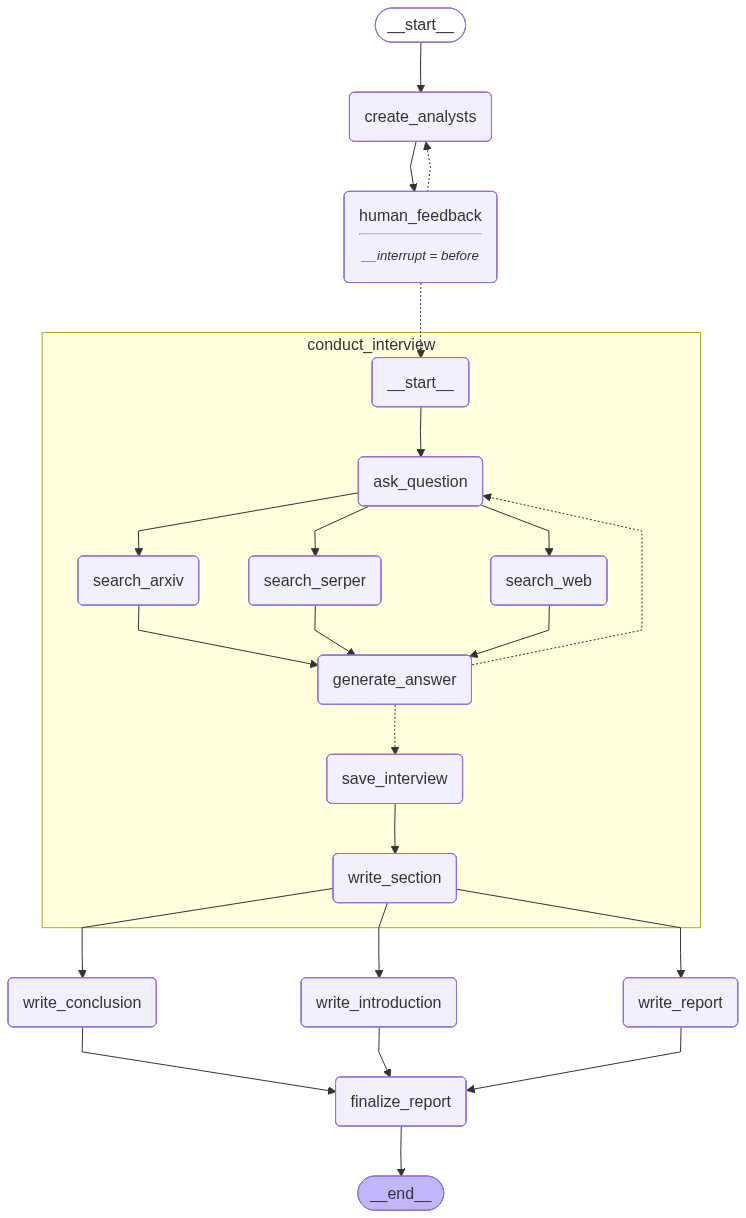

In [157]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [158]:
max_analysts = 3

In [159]:
topic = "How can we use planetary movements to predict human emotions and behaviors?"

In [160]:
thread = {"configurable": {"thread_id":"1"}}

In [161]:
# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50) 

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
analysts=[Analyst(name='Dr. Celeste Orion', role='Astrologer and Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Orion focuses on the intersection of astrology and psychology, exploring how planetary movements can influence human emotions and behaviors. She is particularly interested in the historical and cultural contexts of astrology and how these can be integrated with modern psychological theories to better understand human behavior.'), Analyst(name='Professor Leo Vega', role='Astrophysicist', affiliation='Department of Astronomy, Stellar University', description='Professor Vega is an astrophysicist who examines the scientific basis of planetary movements and their potential impacts on Earth. He is skeptical of traditional astrology but is open to exploring how gravitational forces and cosmic events might have subtle influences on human physiology and p

In [162]:
graph.update_state(thread, {"human_analyst_feedback":"along with it explain one planets effect on mind"}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b021a-0ca3-69ee-8002-d3e4c83570d3'}}

In [163]:
# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Name: Dr. Celeste Orion
Affiliation: Institute of Cosmic Psychology
Role: Astrologer and Psychologist
Description: Dr. Orion focuses on the intersection of astrology and psychology, exploring how planetary movements can influence human emotions and behaviors. She is particularly interested in the historical and cultural contexts of astrology and how these can be integrated with modern psychological theories to better understand human behavior.
--------------------------------------------------
Name: Professor Leo Vega
Affiliation: Department of Astronomy, Stellar University
Role: Astrophysicist
Description: Professor Vega is an astrophysicist who examines the scientific basis of planetary movements and their potential impacts on Earth. He is skeptical of traditional astrology but is open to exploring how gravitational forces and cosmic events might have subtle influences on human physiology and psychology. His work aims to bridge the gap between hard science and the more speculative as

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
analysts=[Analyst(name='Dr. Celeste Harmon', role='Astrological Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Harmon focuses on the psychological impacts of planetary movements, particularly how celestial events influence human emotions and mental states. She is interested in the correlation between planetary alignments and emotional well-being, exploring how these cosmic patterns can be used to predict and understand human behavior.'), Analyst(name='Professor Orion Vega', role='Behavioral Astrologer', affiliation='University of Astrological Sciences', description='Professor Vega studies the behavioral patterns associated with planetary movements. His research delves into how specific planetary transits can trigger changes in human behavior, such as increased aggression or heightened creativity. He aims to develop predictive models that link planetary cyc

In [164]:
graph.update_state(thread, {"human_analyst_feedback":""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b021a-5f1e-6153-8006-0fb6aa97440c'}}

In [165]:
graph.get_state(thread).next

('conduct_interview', 'conduct_interview', 'conduct_interview')

In [166]:
# Continue
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='how planetary movements influence human emotions and behaviors'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
C:\Users\shank\AppData\Local\Temp\ipykernel_18324\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=Mercury+retrograde+effects+on+communication+and+cognitive+processes&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='examples of planetary transits affecting human behavior and emotions'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='Mercury retrograde effects on communication and cognitive processes'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
C:\Users\shank\AppData\Local\Temp\ipykernel_18324\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=examples+of+planetary+transits+affecting+human+behavior+and+emotions&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
C:\Users\shank\AppData\Local\Temp\ipykernel_18324\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=how+planetary+movements+influence+human+emotions+and+behavio

-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*

Got first page: 100 of 2838635 total results


Got first page: 25 of 2862716 total results


-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*
-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
C:\Users\shank\AppData\Local\Temp\ipykernel_18324\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=recent+celestial+events+influence+human+behavior+emotions&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='recent celestial events influence human behavior emotions'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Got first page: 100 of 730870 total results
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
C:\Users\shank\AppData\Local\Temp\ipykernel_18324\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=predictive+models+using+planetary+cycles+for+forecasting+human+behavior+trends&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='predictive models using planetary cycles for forecasting human behavior'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Got first page: 100 of 2620184 total results
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='scientific studies on Mercury retrograde effects on communication and cognition'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
C:\Users\shank\AppData\Local\Temp\ipykernel_18324\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=scientific+studies+on+Mercury+retrograde+effects+on+communication+and+cognition&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Got first page: 25 of 2841340 total results


-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*
-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /chat/completions in 0.814000 seconds
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


--Node--
conduct_interview
--Node--
conduct_interview


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


--Node--
conduct_interview


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


--Node--
write_conclusion


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


--Node--
write_introduction


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


--Node--
write_report
--Node--
finalize_report


In [167]:
from IPython.display import Markdown

In [168]:
final_state = graph.get_state(thread)

In [169]:
report = final_state.values.get('final_report')

In [170]:
Markdown(report)

# Celestial Influences: The Psychological Impact of Planetary Movements

## Introduction

The interplay between planetary movements and human emotions has captivated both ancient astrologers and modern scientists. This report delves into the psychological impacts of celestial events, exploring how planetary alignments and lunar phases might influence our mental states. Dr. Harmon examines the potential electromagnetic effects of these cosmic patterns on human brainwaves, while Professor Vega's research offers predictive models linking planetary cycles with behavioral trends. Additionally, the enigmatic influence of Mercury retrograde on communication and cognition is scrutinized, providing a comprehensive view of how celestial bodies might shape our emotional well-being and decision-making processes.

---



The exploration of planetary movements and their influence on human emotions and behaviors is a captivating intersection of ancient astrological beliefs and modern scientific inquiry. This field seeks to understand how celestial events, such as planetary alignments and lunar phases, can impact human mental states and decision-making processes.

Recent studies suggest that planetary positions might exert subtle electromagnetic influences on Earth, potentially affecting human brainwave patterns and emotional states [1]. This is exemplified by the moon's phases, which have been associated with changes in human emotions and behaviors, such as increased energy and emotional intensity during a full moon [2]. Astrological alignments, like Sun-Saturn or Uranus-Saturn, are believed to influence human behavior by motivating hard work or causing restlessness, respectively [3]. These alignments provide a unique perspective for individuals to gain insight and guidance amidst the chaos of daily life.

The research also highlights the role of emotional contagion in online social media, where emotions like anger and joy can spread rapidly, influenced by network structure and tie strength [5]. This phenomenon mirrors the way celestial events might influence collective human emotions, suggesting a broader context in which planetary movements could impact societal behaviors.

Professor Vega's research delves into the behavioral patterns associated with planetary movements, aiming to uncover the underlying mechanisms that drive these changes. By observing the movements of planets, researchers can predict and interpret emotional changes, offering insights into how celestial cycles influence human behavior [3]. This approach combines traditional astrological beliefs with modern psychological insights, enhancing our understanding of cosmic influences.

One surprising insight is the potential for planetary alignments to exert subtle electromagnetic influences on Earth, affecting human brainwave patterns and emotional states. For example, Mars may evoke feelings of fear and impulsiveness during challenging transits, while Venus and the Moon influence love and relationships [4][5]. Understanding individual differences in emotional expression is crucial, as these can lead to inconsistent emotional responses. By incorporating personality traits into predictive models, researchers can simulate emotion transitions in conversation, providing a more personalized approach to understanding cosmic influences [6].

Mercury, particularly during its retrograde periods, is believed to disrupt communication, technology, and cognitive processes. These retrograde phases, occurring three to four times a year, are associated with mental fog, communication breakdowns, and technological mishaps [2][3]. Despite the lack of scientific evidence supporting these claims, the belief in Mercury's astrological influence persists. Interestingly, Mercury retrograde also presents opportunities for reflection and deeper understanding, offering valuable insights for decision-making and relationship management [4][5].

In conclusion, the study of planetary movements and their influence on human emotions and behaviors is a rich field that combines ancient wisdom with modern scientific inquiry. By understanding these cosmic patterns, we can gain valuable insights into human behavior, emotional well-being, and decision-making processes.


---

## Conclusion

The exploration of planetary movements and their influence on human emotions and behaviors bridges ancient astrological beliefs with modern scientific inquiry. Dr. Harmon's insights into the psychological impacts of celestial events reveal potential mechanisms, such as electromagnetic influences, that may affect human brainwave patterns and emotional states. Professor Vega's research further delves into how specific planetary transits can trigger behavioral changes, offering predictive models that link cosmic cycles with human behavior. The enigmatic influence of Mercury, particularly during its retrograde periods, highlights the dual nature of celestial impacts—both challenging and enlightening. Together, these studies underscore the profound and multifaceted ways in which planetary movements may shape our emotional well-being and decision-making processes, inviting continued exploration and understanding.

## Sources
[1] https://medium.com/exploring-the-cosmos/the-science-behind-astrology-unraveling-the-cosmos-influence-on-human-life-455ba7ab3433  
[2] https://www.almanac.com/can-full-moon-affect-your-mood  
[3] https://timesofindia.indiatimes.com/astrology/zodiacs-astrology/how-planetary-alignments-influence-human-behavior/articleshow/109557408.cms  
[4] https://fullmoonbehavioral.com/your-mental-health-and-astrology-how-the-movement-of-planets-and-the-moon-influence-mood-and-emotions/  
[5] http://arxiv.org/abs/1706.02676v1  
[6] http://arxiv.org/abs/2106.15846v1  
[7] http://arxiv.org/abs/2404.17523v1  
[8] https://www.jpost.com/consumerism/article-867963  
[9] https://astrovoice.ai/blogs/the-influence-of-mercury-retrograde-on-your-communication-and-relationships  
[10] https://www.keen.com/articles/love/how-mercury-retrograde-affects-communication-understanding-in-your-love-life  
[11] https://www.almanac.com/mercury-retrograde-and-zodiac-